# Customer Churn Prediction (Telco)

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### Problem statement
* In the highly competitive telecommunications industry, customers have a wide range of providers to choose from and can easily switch to a competitor. This results in a high annual churn rate, which can be expensive for companies. Customer retention is far more cost-effective than customer acquisition. 
* The problem: Without a robust method for predicting which customers are at high risk of leaving, the company cannot take proactive, targeted actions to retain them. 

### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/blastchar/telco-customer-churn
- The data consists of 21 column and 7044 rows.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('../data/processed/train.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4950-BDEUX,Male,0,No,No,35,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,49.20,1701.65,No
1,7993-NQLJE,Male,0,Yes,Yes,15,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,75.10,1151.55,No
2,7321-ZNSLA,Male,0,Yes,Yes,13,No,No phone service,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Mailed check,40.55,590.35,No
3,4922-CVPDX,Female,0,Yes,No,26,Yes,No,DSL,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),73.50,1905.7,No
4,2903-YYTBW,Male,0,Yes,Yes,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,44.55,44.55,No


Displaying first 5 rows of the training dataset for refrencing purpose 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


1) From the given information regarding the dataset we can infer that majority of the columns are of object data type.
2) while only three columns namely [SeniorCitizen , tenure, MonthlyCharges ] represents numerical datatypes {int,float}.

In [6]:
df.drop(columns=["customerID"],inplace=True)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5634.0,0.163294,0.369667,0.0,0.0000,0.0,0.0,1.00
tenure,5634.0,32.485091,24.568744,0.0,9.0000,29.0,55.0,72.00
MonthlyCharges,5634.0,64.929961,30.138105,18.4,35.6625,70.5,90.0,118.75


#### Shape of the Training Dataset

In [8]:
df.shape

(5634, 20)

#### Checking null values

In [9]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##### No Null Values are present in this Data

### Checking Duplicate Values

In [10]:
df.duplicated().sum()

np.int64(15)

##### No Duplicate Values present in this Dataset 

### Checking the number of unique values of each column

In [11]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1489
TotalCharges        5276
Churn                  2
dtype: int64

#### 1) We can see that all the columns with object data type have almost equal amount of Unique values ranging from (2 to 4)
#### 2) All the numerical displays great variety of unique values stating that they are continous features 

In [12]:
for c in df.columns:
    if df[c].dtype == "object":
        print(f"Categories in {c} variable:-----------> ",end=" " )
        print(df[c].unique())
        print()

Categories in gender variable:----------->  ['Male' 'Female']

Categories in Partner variable:----------->  ['No' 'Yes']

Categories in Dependents variable:----------->  ['No' 'Yes']

Categories in PhoneService variable:----------->  ['No' 'Yes']

Categories in MultipleLines variable:----------->  ['No phone service' 'No' 'Yes']

Categories in InternetService variable:----------->  ['DSL' 'Fiber optic' 'No']

Categories in OnlineSecurity variable:----------->  ['No' 'Yes' 'No internet service']

Categories in OnlineBackup variable:----------->  ['No' 'Yes' 'No internet service']

Categories in DeviceProtection variable:----------->  ['Yes' 'No' 'No internet service']

Categories in TechSupport variable:----------->  ['No' 'Yes' 'No internet service']

Categories in StreamingTV variable:----------->  ['Yes' 'No' 'No internet service']

Categories in StreamingMovies variable:----------->  ['Yes' 'No' 'No internet service']

Categories in Contract variable:----------->  ['Month-to-month' 

### Target Variable Analysis
* How many customers churned versus stayed? This is crucial because if very few customers churn, our model might have a hard time learning.

Churn
No     73.464679
Yes    26.535321
Name: proportion, dtype: float64


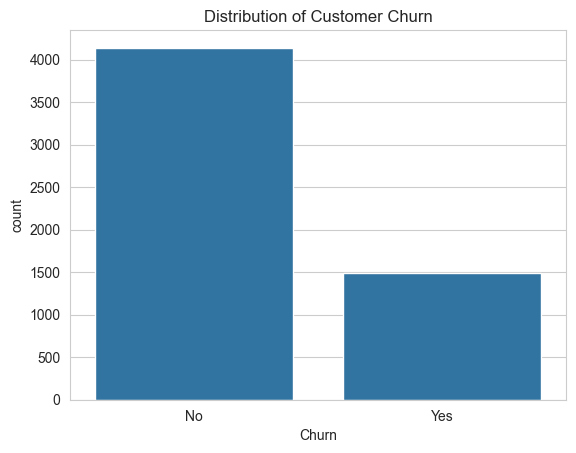

In [13]:
print(df['Churn'].value_counts(normalize=True)*100)

sns.countplot(x='Churn', data=df)
plt.title('Distribution of Customer Churn')
plt.show()

### INFRENCES
###### (Note -: the churn rate is the percentage of customers that leave within a given amount of time.)
* Acc to the count plot above we can see that the amount of Customers leaving the telecom industry is way less then the amount of Customers deciding to stay with the industry(Retention rate)
* Approx 73% of customers are deciding to stay with the Company (did not churn)
* Approx 26% of customers have churned and decided to switch to another competitor
##### * Overall we can say that from this data and graph it is clear that Retention Rate is higher then Churning Rate
##### Retention Rate >> Churning Rate

#### Converting 'TotalCharges' from object Datatype to float Datatype

In [14]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors="coerce")
print(df['TotalCharges'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 5634 entries, 0 to 5633
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
5626 non-null   float64
dtypes: float64(1)
memory usage: 44.1 KB
None


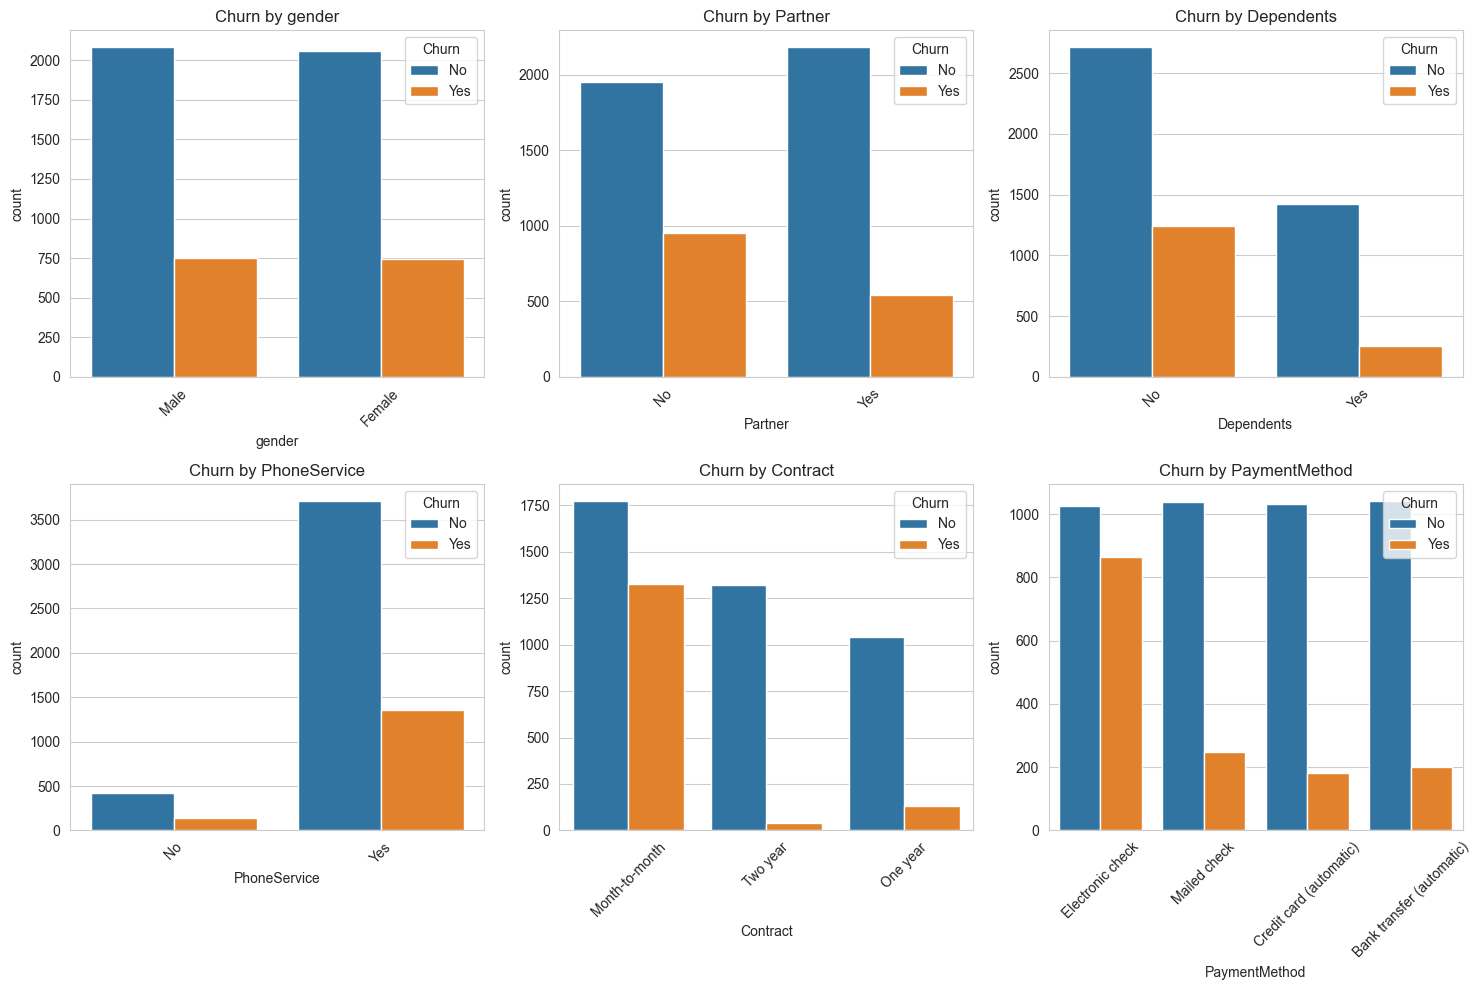

In [15]:
# Features to analyze
cat_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'Contract', 'PaymentMethod']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_features):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'Churn by {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### KEY INFRENCES
#### 1) Contract Type is the BIGGEST Churn Indicator
* This is the most important finding. Customers on a Month-to-month contract churn at an extremely high rate. In contrast, those with One year or Two year contracts are far more loyal. This makes sense—longer commitments leads to better retention.

#### 2) Personal Life Matters (Partners & Dependents)
* No Partner, Higher Churn: Customers without a partner are significantly more likely to churn than those who have one.

* No Dependents, Higher Churn: This is even more dramatic. Customers without dependents churn at a much higher rate. Having dependents is a strong indicator of stability and loyalty.

#### 3) Payment Method Reveals Risk
* Customers who pay by Electronic check have a noticeably higher churn rate than all other payment methods. Automatic payment methods (like credit card or bank transfer) are associated with much lower churn, likely because they are more convenient and indicate a more stable customer relationship.

#### 4) Gender and Phone Service are NOT Strong Predictors
* Gender: The churn rate is almost identical for both males and females. This feature probably won't be very useful for our model.

* Phone Service: The vast majority of customers have phone service, and the churn rate within that group is proportional. This feature doesn't seem to be a major factor.

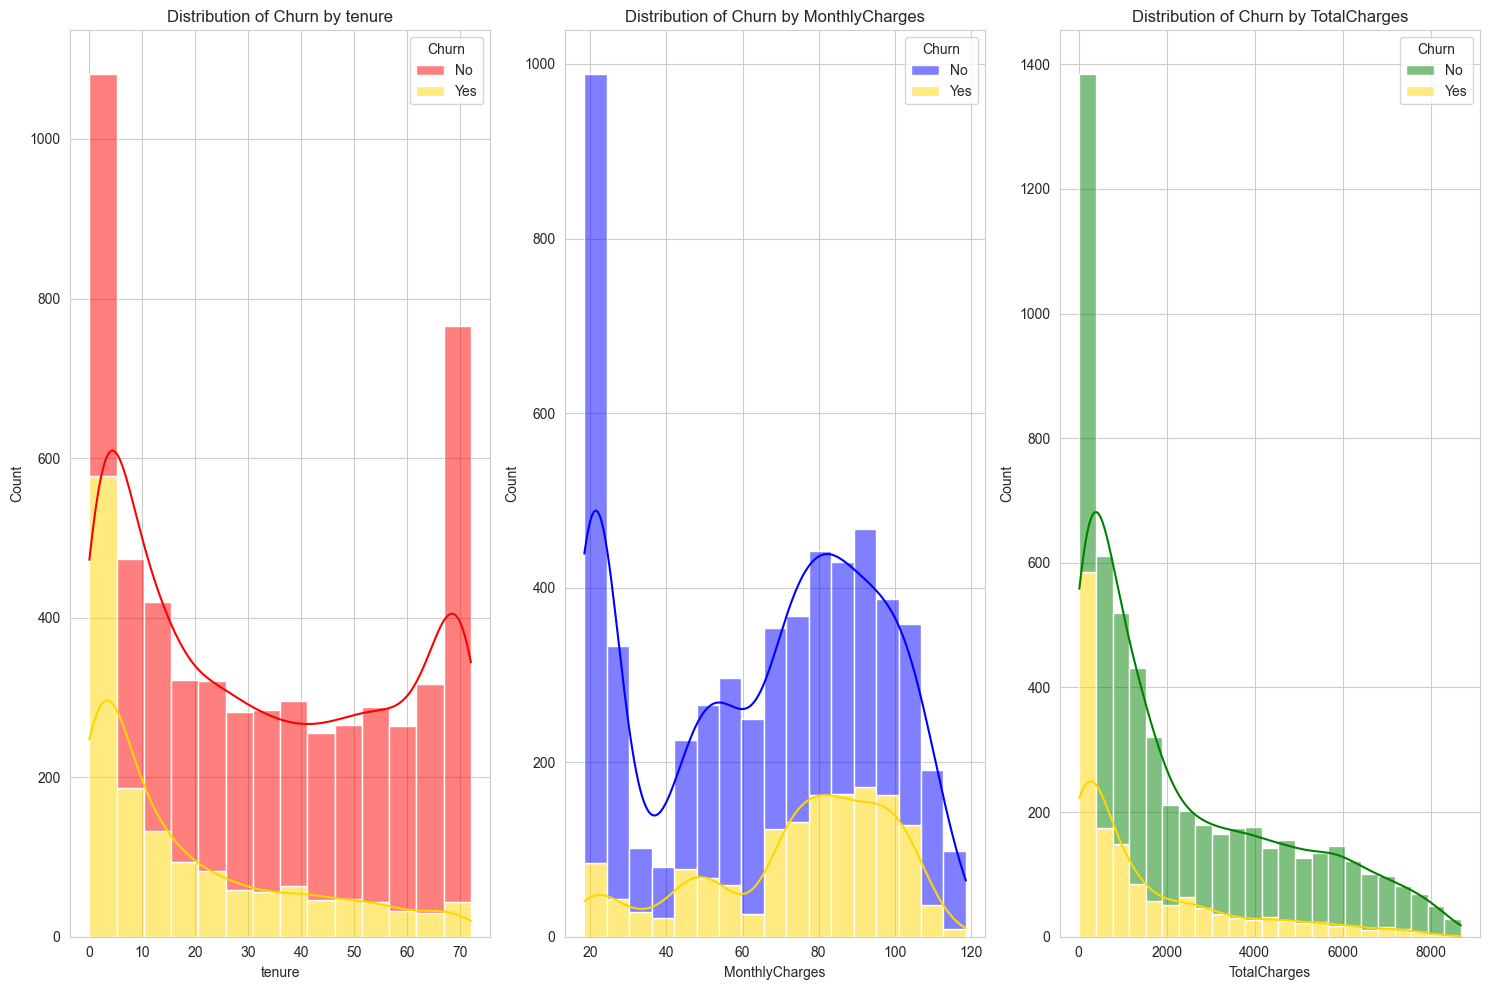

In [16]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
colors = {'tenure':"red",'MonthlyCharges':"blue",'TotalCharges':"green"}
plt.figure(figsize=(15, 10))
for i,col in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)
    color = colors[col]
    sns.histplot(data=df,x=col,hue="Churn",kde=True, multiple="stack",palette=[color, 'gold'])
    plt.title(f'Distribution of Churn by {col}')
    plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### KEY INFRENCES
#### 1) Tenure (Left Plot - Red/Yellow)
* High Churn at Low Tenure: There is a massive peak in the number of churned customers (Yellow bars) among those with very low tenure (0-5 months). This suggests that customers often decide to leave very early in their contract or service period.

* Low Churn for Long-Term Customers: Customers with a high tenure (around 60-72 months) have a significantly lower proportion of churn (Yellow) relative to non-churn (Red). This indicates that loyalty increases with the length of service.

#### 2) Monthly Charges (Middle Plot - Blue/Yellow)
* High Churn at High Charges: The proportion of churned customers (Yellow) is notably higher among customers with high Monthly Charges (approximately $$$80 to $$$110).

* Low Churn at Low Charges: Customers with very low monthly charges (e.g., $$$20 or less) have a much smaller proportion of churn. These are likely customers with basic, low-cost plans.

#### 3) Total Charges (Right Plot - Green/Yellow)
* High Churn at Low Total Charges: The majority of churned customers (Yellow) are concentrated at the low end of the Total Charges (close to $$$0). This aligns perfectly with the Tenure observation: customers who churned early haven't accumulated high total charges yet.

* Low Churn at High Total Charges: As Total Charges increase, the total number of customers drops, but the proportion of churn (Yellow) becomes very small. This confirms that customers who have been with the company long enough to accumulate high total charges are very unlikely to leave.

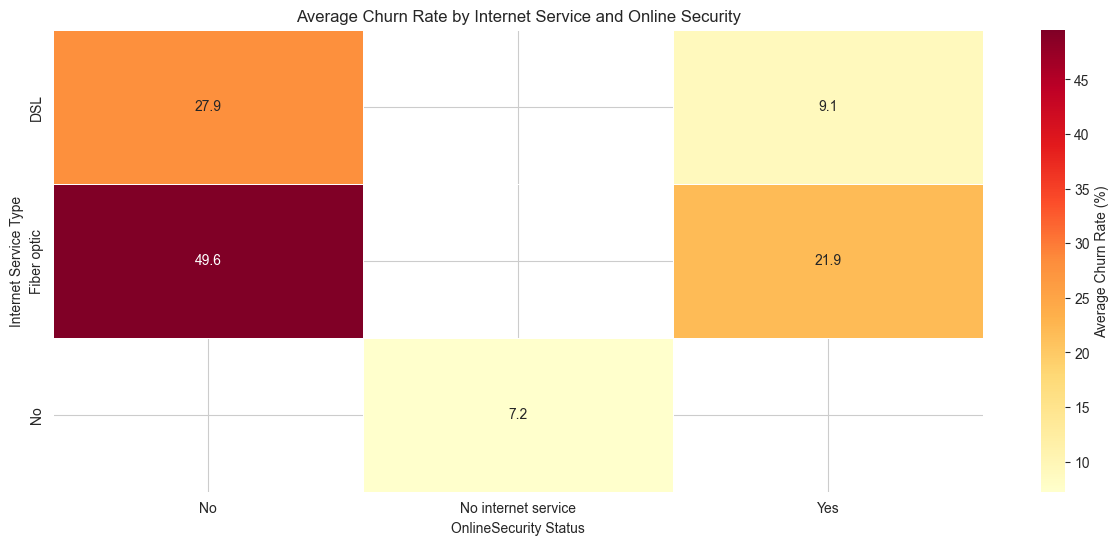

In [17]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0}).fillna(0)
pivot_table = df.pivot_table(values='Churn',index='InternetService',columns='OnlineSecurity',aggfunc='mean')
pivot_table = pivot_table * 100
plt.figure(figsize=(15, 6))
sns.heatmap(
    pivot_table,
    annot=True,            # Show the numeric churn rates on the heatmap
    fmt=".1f",             # Format the numbers to one decimal place
    cmap="YlOrRd",         # Choose a color map (Yellow-Orange-Red)
    linewidths=.5,         # Add lines to separate cells
    cbar_kws={'label': 'Average Churn Rate (%)'}
)
plt.title('Average Churn Rate by Internet Service and Online Security')
plt.xlabel('OnlineSecurity Status')
plt.ylabel('Internet Service Type')
plt.show()

### INFRENCES
##### The Impact of Internet Service Type
* Customers with Fiber Optic are generally more likely to churn than those with DSL, regardless of their Online Security status.
* Inference: While Fiber Optic is desirable, it seems to be associated with higher churn volatility. This could be due to customer expectations, reliability issues, or competitor pricing in the high-speed market.

#####  The Highest Churn Risk (The "Worst" Combination)
* The highest churn rate is observed among customers with Fiber Optic internet service who do not have Online Security.

##### The Lowest Churn Risk (The "Best" Combination)
* The lowest churn rates are found in two distinct groups, both representing low complexity or high security/stability.
  1) No Internet Service: 7.4% average churn rate (regardless of Online Security, as this feature is irrelevant for this group).
  2) DSL / Yes Online Security: 9.5% average churn rate.

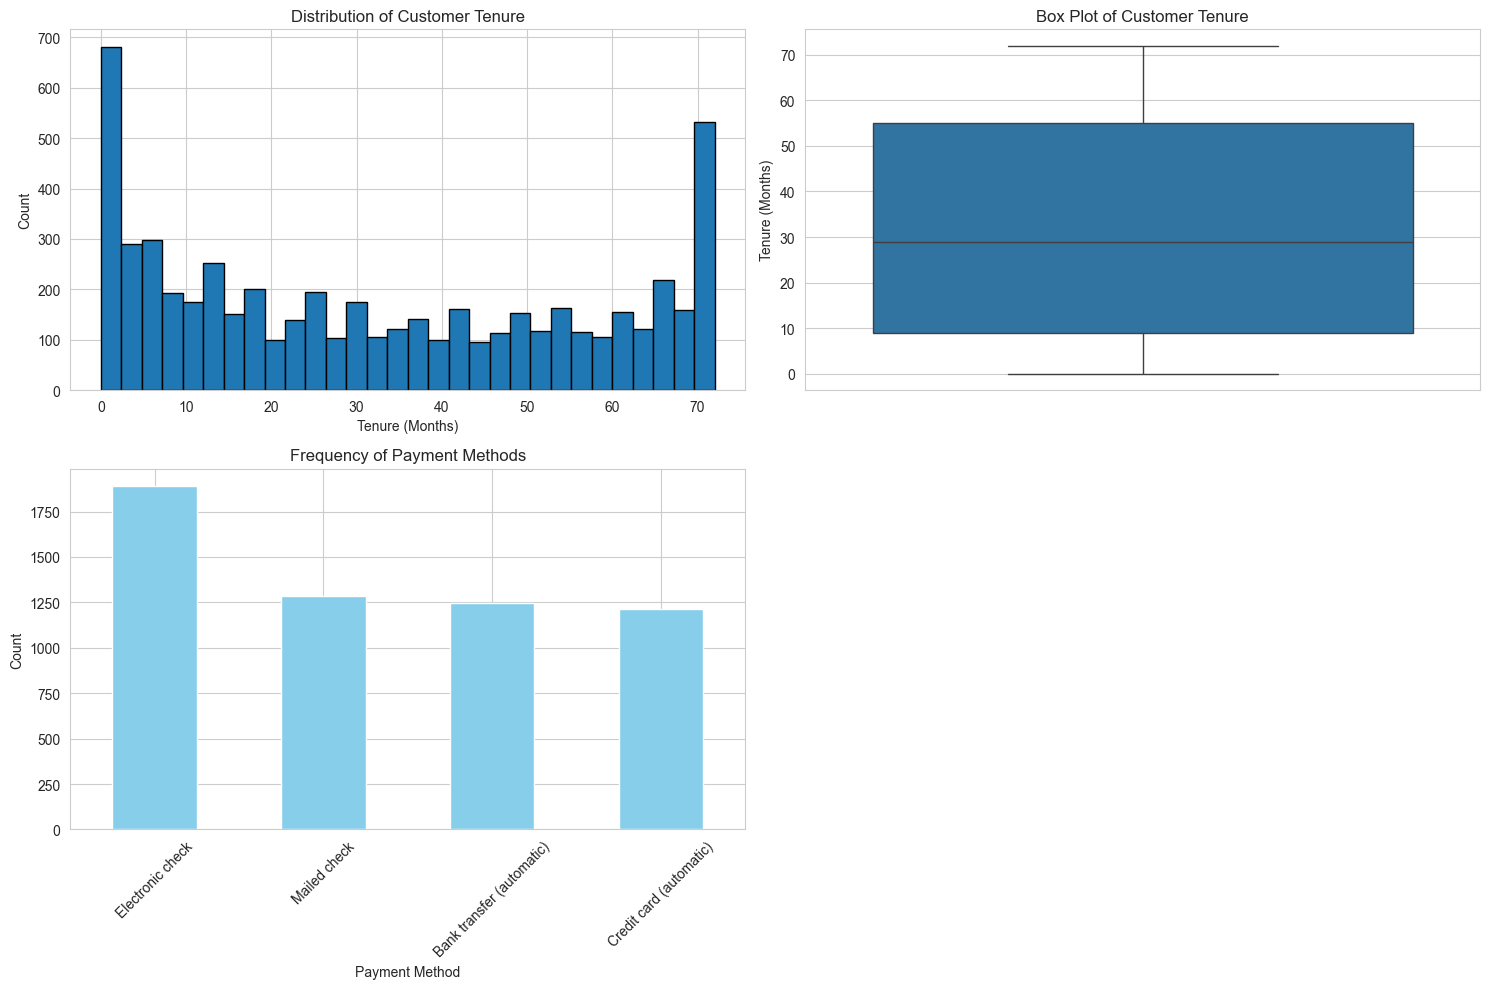

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

df['tenure'].hist(bins=30, edgecolor='black', ax=ax[0, 0])
ax[0, 0].set_title('Distribution of Customer Tenure')
ax[0, 0].set_xlabel('Tenure (Months)')
ax[0, 0].set_ylabel('Count')

sns.boxplot(y=df['tenure'], ax=ax[0, 1])
ax[0, 1].set_title('Box Plot of Customer Tenure')
ax[0, 1].set_ylabel('Tenure (Months)')
ax[0, 1].set_xlabel('')

df['PaymentMethod'].value_counts().plot(
    kind='bar', 
    color='skyblue', 
    ax=ax[1,0] 
)
ax[1, 0].set_title('Frequency of Payment Methods')
ax[1, 0].set_xlabel('Payment Method')
ax[1, 0].set_ylabel('Count')
ax[1, 0].tick_params(axis='x', rotation=45)

ax[1, 1].set_visible(False) 

plt.tight_layout()

### INFRENCES
##### Distribution of Customer Tenure (Longevity)
* High Concentration at 0-5 Months: There is a huge peak for customers with very short tenure. These are new customers, and this group often contains the majority of the churn risk.

* High Concentration at 65-72 Months: There is another large peak for customers with the maximum tenure. These are long-term, highly loyal customers who are unlikely to churn.

* Lower Frequency in the Middle: The number of customers is significantly lower between ≈10 and 60 months, suggesting that if a customer survives the initial "danger zone" (the first 10 months), they are fairly likely to stay for the long term.

##### Outlier Analysis for Tenure
* Idealy, there are no noticeable outliers (individual dots outside the whiskers). This indicates that the tenure column is well-behaved and doesn't contain any extreme or erroneous values that fall outside the typical range for this dataset.

##### Frequency of Payment Methods (Imbalance Check)
* Dominant Method: Electronic check is the most popular payment method by a notable margin.

* Relative Balance: The other three methods (Mailed check, Bank transfer (automatic), and Credit card (automatic)) are used by similar numbers of customers, creating a relative balance among these three.

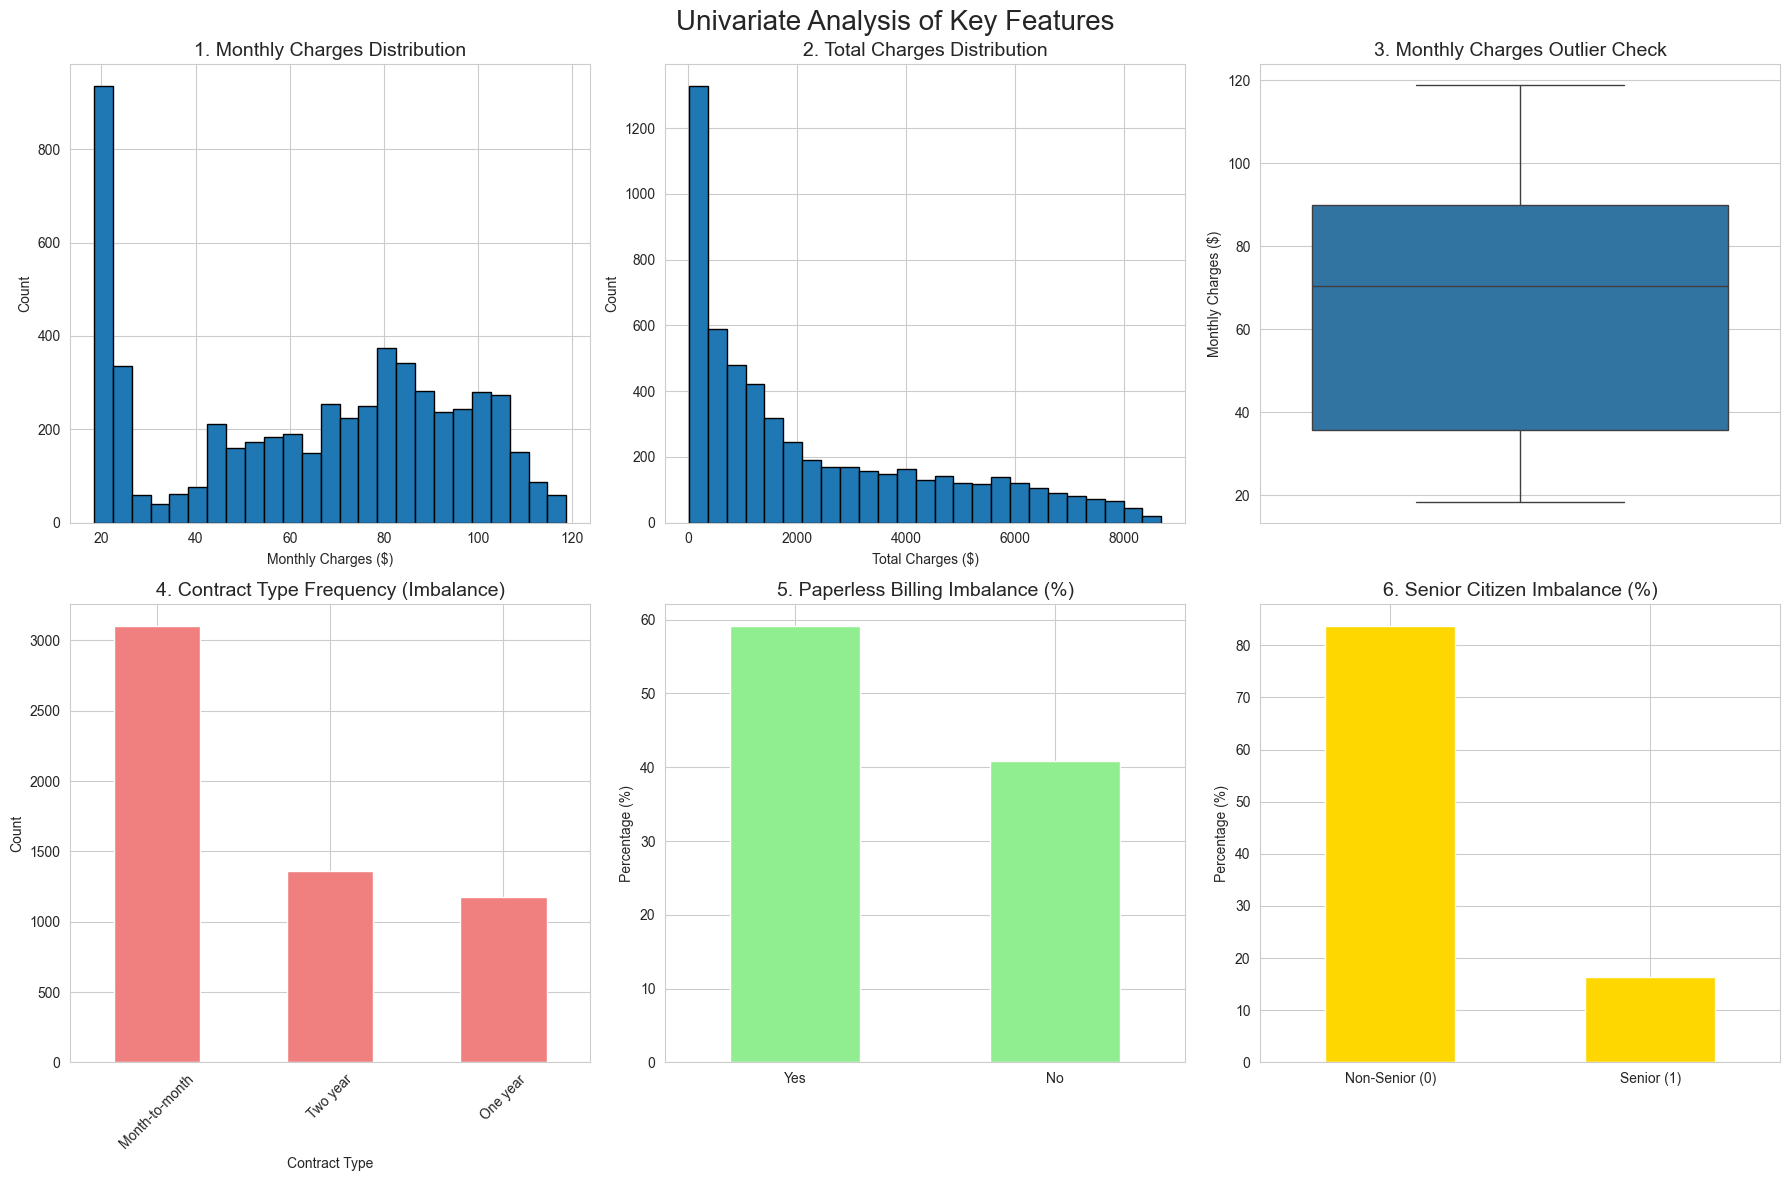

In [19]:
fig, ax = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Univariate Analysis of Key Features', fontsize=20)

df['MonthlyCharges'].hist(bins=25, edgecolor='black', ax=ax[0, 0])
ax[0, 0].set_title('1. Monthly Charges Distribution', fontsize=14)
ax[0, 0].set_xlabel('Monthly Charges ($)')
ax[0, 0].set_ylabel('Count')

df['TotalCharges'].hist(bins=25, edgecolor='black', ax=ax[0, 1])
ax[0, 1].set_title('2. Total Charges Distribution', fontsize=14)
ax[0, 1].set_xlabel('Total Charges ($)')
ax[0, 1].set_ylabel('Count')

sns.boxplot(y=df['MonthlyCharges'], ax=ax[0, 2])
ax[0, 2].set_title('3. Monthly Charges Outlier Check', fontsize=14)
ax[0, 2].set_ylabel('Monthly Charges ($)')
ax[0, 2].set_xlabel('')

df['Contract'].value_counts().plot(kind='bar', color='lightcoral', ax=ax[1, 0])
ax[1, 0].set_title('4. Contract Type Frequency (Imbalance)', fontsize=14)
ax[1, 0].tick_params(axis='x', rotation=45)
ax[1, 0].set_xlabel('Contract Type')
ax[1, 0].set_ylabel('Count')

df['PaperlessBilling'].value_counts(normalize=True).mul(100).plot(kind='bar', color='lightgreen', ax=ax[1, 1])
ax[1, 1].set_title('5. Paperless Billing Imbalance (%)', fontsize=14)
ax[1, 1].set_ylabel('Percentage (%)')
ax[1, 1].tick_params(axis='x', rotation=0)
ax[1, 1].set_xlabel('')

df['SeniorCitizen'].value_counts(normalize=True).mul(100).plot(kind='bar', color='gold', ax=ax[1, 2])
ax[1, 2].set_title('6. Senior Citizen Imbalance (%)', fontsize=14)
ax[1, 2].set_ylabel('Percentage (%)')
ax[1, 2].set_xticklabels(['Non-Senior (0)', 'Senior (1)'], rotation=0) 
ax[1, 2].set_xlabel('')

plt.tight_layout() 

### INFRENCES
##### Numerical Features: Charges and Outliers
* Distribution (Plot 1): The data is bimodal, meaning it has two peaks. There is a high volume of customers paying low charges (around $20 per month, likely for basic phone service or small bundles), and another high volume paying high charges (around $70−$110 per month, likely for high-tier internet or full bundles). The middle range (≈$40−$60) is less populated.

* Outliers (Plot 3): The box plot shows no significant outliers. The whiskers extend to the full range of the data, indicating that the minimum and maximum monthly charges are typical for the population.

##### Total Charges (Plot 2)
* Distribution: The data is heavily right-skewed. The vast majority of customers have relatively low total charges (under $1000). This is expected because TotalCharges is highly correlated with tenure. The long tail stretching out to $8000 represents the small group of long-term customers with high monthly plans.

#### Categorical Features: Imbalance and Frequency
##### Contract Type (Plot 4)
* Imbalance: There is a significant imbalance in contract type.
   1) Month-to-month contracts overwhelmingly dominate the dataset, accounting for well over 3,500 customers.
   2) One-year and Two-year contracts are far less frequent.
* Inference: Your customer base is largely fluid, meaning a significant portion of customers are not locked into long-term         commitments, which suggests a high inherent churn risk.

##### Paperless Billing (Plot 5)
* Imbalance: Paperless Billing is the preferred option.
   1) Approximately 60% of customers use Paperless Billing ('Yes').
   2) Approximately 40% of customers still receive paper bills ('No').
* Inference: Your customer base is largely fluid, meaning a significant portion of customers are not locked into long-term         commitments, which suggests a high inherent churn risk.

##### Senior Citizen (Plot 6)
* Severe Imbalance: This column shows a strong imbalance.
   1) Non-Senior Citizens (0) make up the vast majority (around ≈84%).
   2) Senior Citizens (1) account for only a small minority (around ≈16%).
* Inference: Any significant churn behavior found within the Senior Citizen group will be impactful to the model due to their small size, but the majority of churn events will necessarily come from the much larger Non-Senior Citizen group. This imbalance needs to be kept in mind during analysis and potentially during model training.



 

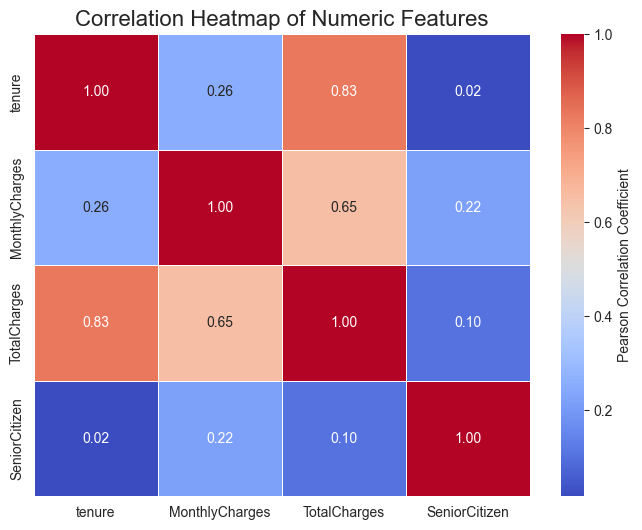

In [20]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen'] 
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True , fmt=".2f", cmap='coolwarm', linewidths=.5, cbar_kws={'label': 'Pearson Correlation Coefficient'})
plt.title('Correlation Heatmap of Numeric Features', fontsize=16)
plt.show() 

### INFRENCES
##### High Multicollinearity (The Most Important Finding)
* tenure and TotalCharges (r=0.83): There is a very strong positive correlation between customer longevity (tenure) and the total charges accumulated (TotalCharges).
  1) Inference: This confirms our expectation that these two features are measuring almost the same thing (cumulative time and cumulative cost). The correlation of 0.83 is high enough to cause multicollinearity issues in models like Logistic Regression. We should consider dropping one of these columns (likely TotalCharges) before model training to avoid unstable coefficient estimates.

##### Moderate to Weak Relationships
* MonthlyCharges and TotalCharges (r=0.65): There is a moderate positive correlation. This makes sense, as higher monthly plans naturally lead to higher total charges over time. This value is not high enough to warrant dropping a column purely based on this correlation alone.

* MonthlyCharges and tenure (r=0.25): There is a weak positive correlation. This suggests that while there's a slight tendency for long-term customers to have higher monthly charges, the relationship is not very strong. Many short-term customers could still be on expensive plans (e.g., Fiber Optic).  

##### Senior Citizen (Weak Predictor of Numerical Features)
* SeniorCitizen and other features (r≤0.22): The SeniorCitizen feature (which is binary: 0 or 1) has weak correlations with all other numeric features.